In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import sklearn.cluster

Load data:

In [3]:
gender_set = pd.read_csv('gender_set.csv', header=0, sep=',')
gender_set['gender']= np.nan
gender_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9378 entries, 0 to 9377
Data columns (total 14 columns):
id                 9378 non-null int64
followers_count    9378 non-null int64
comment_count      9378 non-null int64
post_count         9378 non-null int64
like_count         9378 non-null int64
friends_count      9378 non-null int64
group_count        9378 non-null int64
posts_count        9378 non-null int64
reposts_count      9378 non-null int64
videos_count       9378 non-null int64
audios_count       9378 non-null int64
photos_count       9378 non-null int64
gifts_count        9378 non-null int64
gender             0 non-null float64
dtypes: float64(1), int64(13)
memory usage: 1.0 MB


In [4]:
data=gender_set.drop(['gender','id'], axis=1)

In [5]:
head_data=data.columns.values.tolist()
print(head_data)

['followers_count', 'comment_count', 'post_count', 'like_count', 'friends_count', 'group_count', 'posts_count', 'reposts_count', 'videos_count', 'audios_count', 'photos_count', 'gifts_count']


Primary analysis & preprocessing

In [6]:
data.describe()

,followers_count,comment_count,post_count,like_count,friends_count,group_count,posts_count,reposts_count,videos_count,audios_count,photos_count,gifts_count
count,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000,9378.000000
mean,290.838665,369.774259,2182.750906,717.770740,241.762423,462.732352,151.456387,847.549158,476.929942,343.110578,1163.181169,15.700256
std,1289.457000,1982.914753,4755.198206,1586.794788,609.776258,931.688135,434.175973,1752.670398,969.344916,983.092726,3638.611962,61.774170
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,6.000000,500.000000,114.000000,26.000000,0.000000,20.000000,273.000000,36.000000,0.000000,95.000000,0.000000
50%,88.000000,23.000000,900.000000,294.000000,78.000000,176.000000,57.000000,440.000000,155.000000,0.000000,360.500000,0.000000
75%,230.000000,139.000000,1929.500000,749.000000,219.000000,518.000000,153.000000,781.000000,480.000000,255.000000,1093.750000,12.000000
max,77922.000000,127818.000000,119225.000000,43110.000000,10002.000000,9976.000000,14378.000000,36462.000000,9953.000000,10004.000000,183264.000000,2608.000000


In [7]:
count_str_data=len(data)
print(count_str_data)

9378


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245C1427F60>,
      dtype=object)

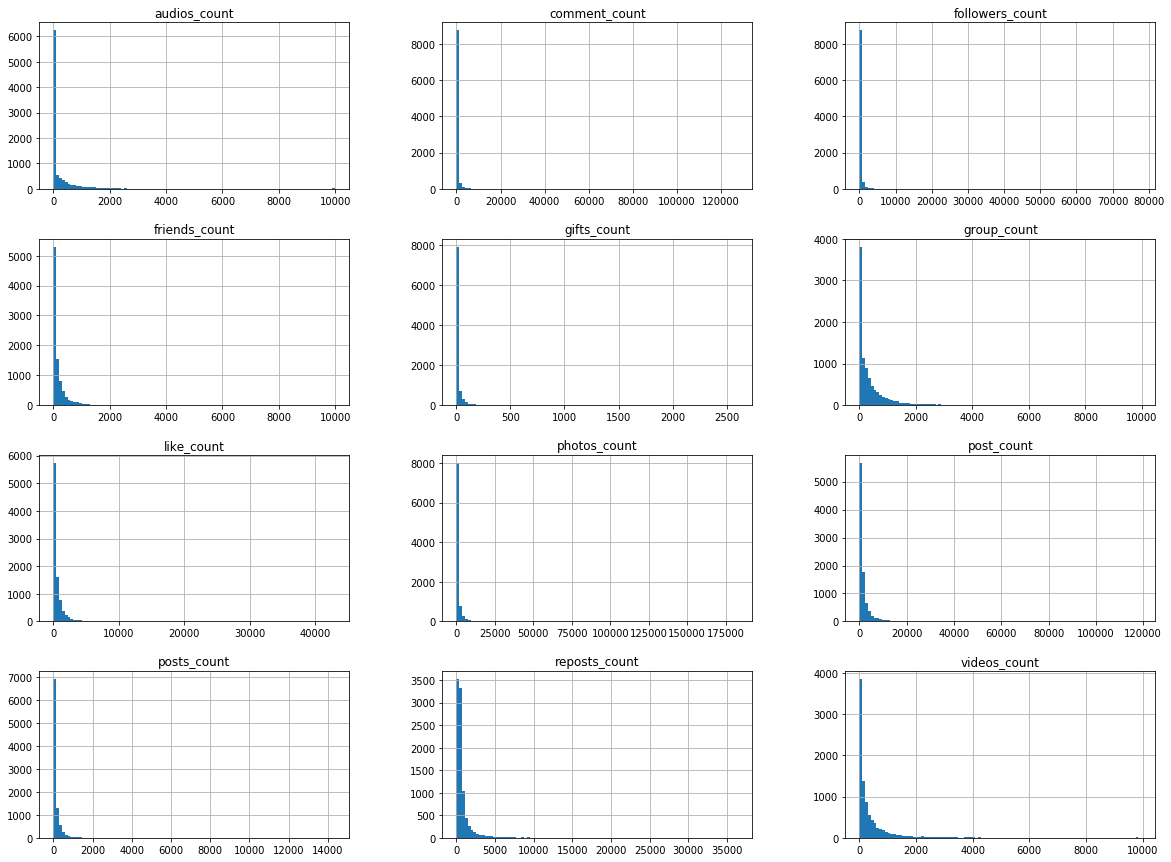

In [8]:
data.hist(bins=100, figsize=(20,15))

The percentage of zero values in the column

In [9]:
for i in head_data:
    print('zero values in ',i,' = ', len(data.loc[data[i] == 0])/count_str_data*100, '%')

zero values in  followers_count  =  2.217956920452122 %
zero values in  comment_count  =  0.0 %
zero values in  post_count  =  0.0 %
zero values in  like_count  =  0.0 %
zero values in  friends_count  =  0.0 %
zero values in  group_count  =  32.341650671785025 %
zero values in  posts_count  =  1.599488163787588 %
zero values in  reposts_count  =  1.034335679249307 %
zero values in  videos_count  =  3.625506504585199 %
zero values in  audios_count  =  53.28428236297717 %
zero values in  photos_count  =  1.183621241202815 %
zero values in  gifts_count  =  59.68223501812753 %


In [10]:
data=data.drop(['audios_count'], axis=1)
data=data.drop(['gifts_count'], axis=1)
data=data.drop(['comment_count'], axis=1)
data=data.drop(['group_count'], axis=1)
data.shape

(9378, 8)

In [ ]:
#data=data[data['friends_count']<1500]
#data=data[data['followers_count']<3000]
#data=data[data['photos_count']<3000]
#data=data[data['videos_count']<4000]
#data=data[data['comment_count']<5000]
#data=data[data['reposts_count']<20000]
#data=data[data['post_count']<12000]
#data=data[data['like_count']<4000]
#data=data[data['posts_count']<1500]
#data=data[data['group_count']<3000]
#data.shape

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245C1429F60>,
      dtype=object)

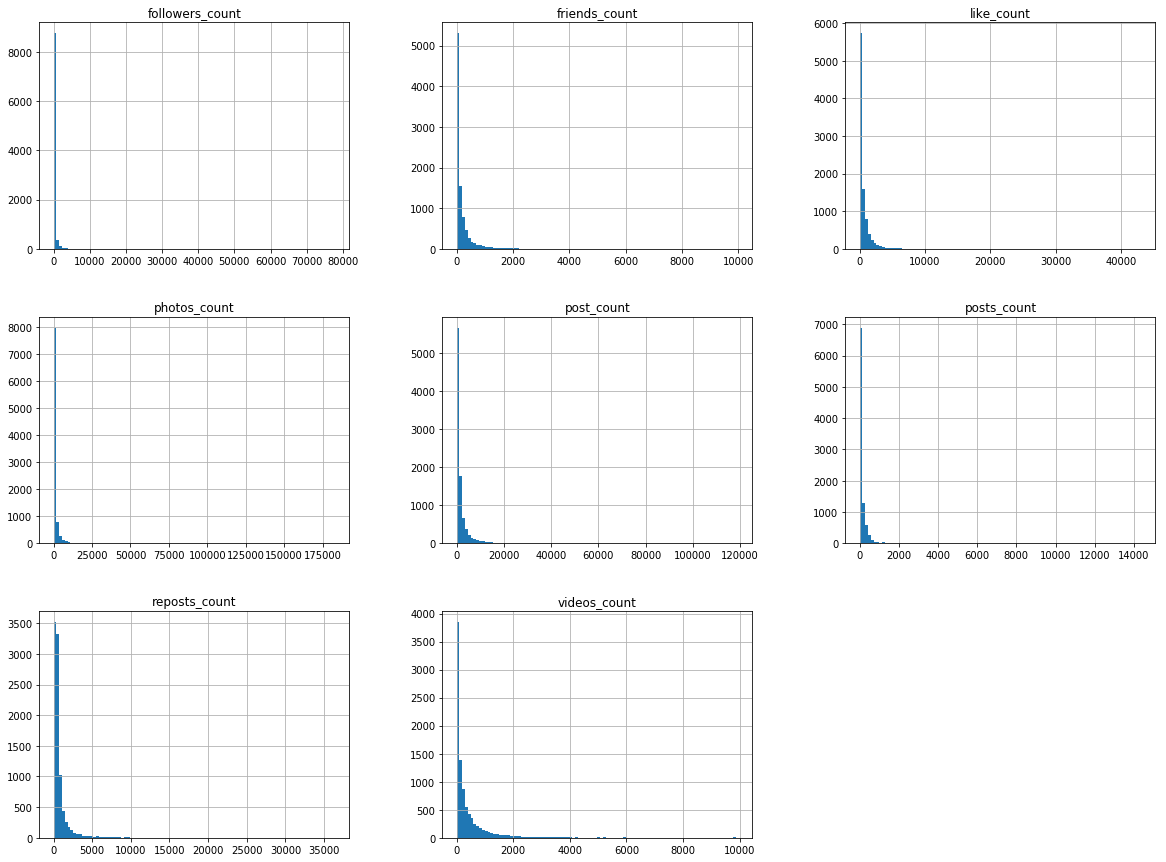

In [11]:
data.hist(bins=100, figsize=(20,15))

In [12]:
from sklearn import preprocessing

data_array=np.array(data.values)
min_max_scaler = preprocessing.MinMaxScaler()
normalizer =preprocessing.Normalizer()
quantileTransformer = preprocessing.QuantileTransformer()

#data_array = min_max_scaler.fit_transform(data_array)
data_array = normalizer.fit_transform(data_array)
#data_array = quantileTransformer.fit_transform(data_array)

#data_array = preprocessing.normalize(data_array)
data = pd.DataFrame(data_array,  columns =  data.columns.values.tolist())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000245C41A9080>,
      dtype=object)

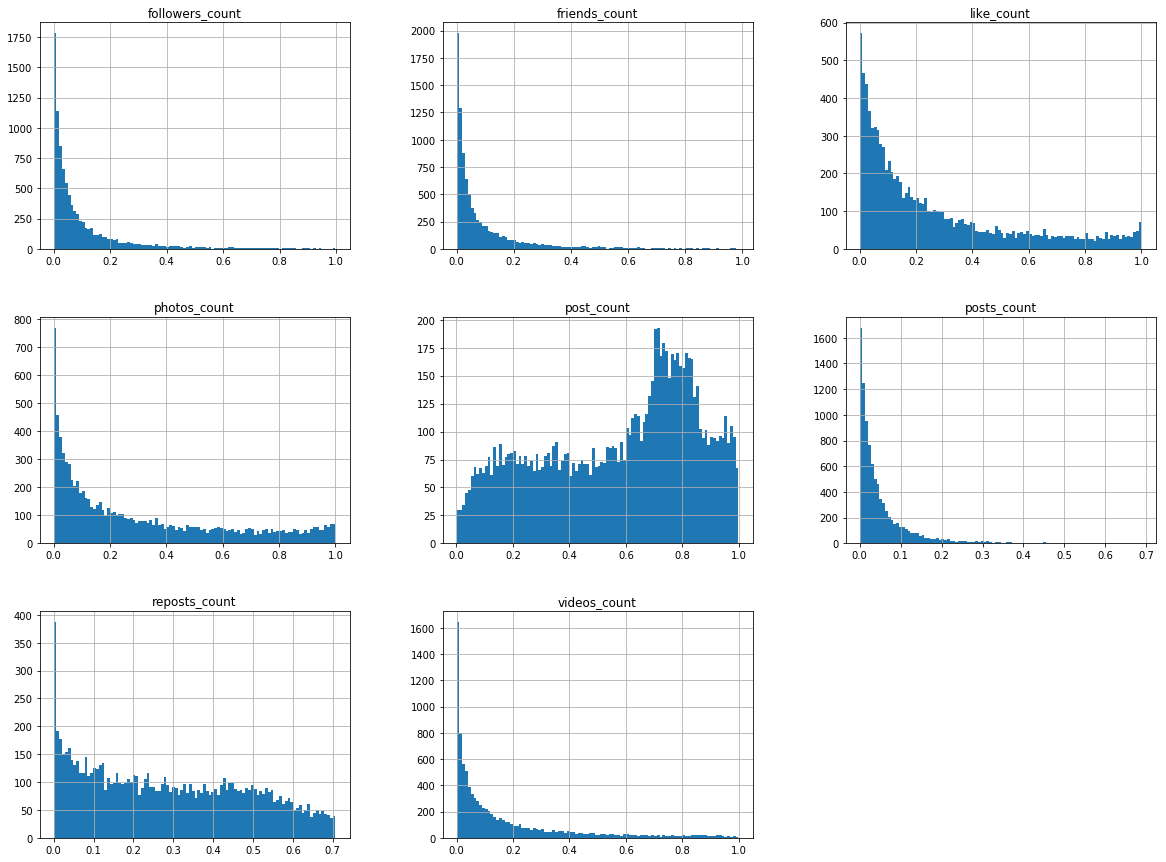

In [13]:
data.hist(bins=100, figsize=(20,15))

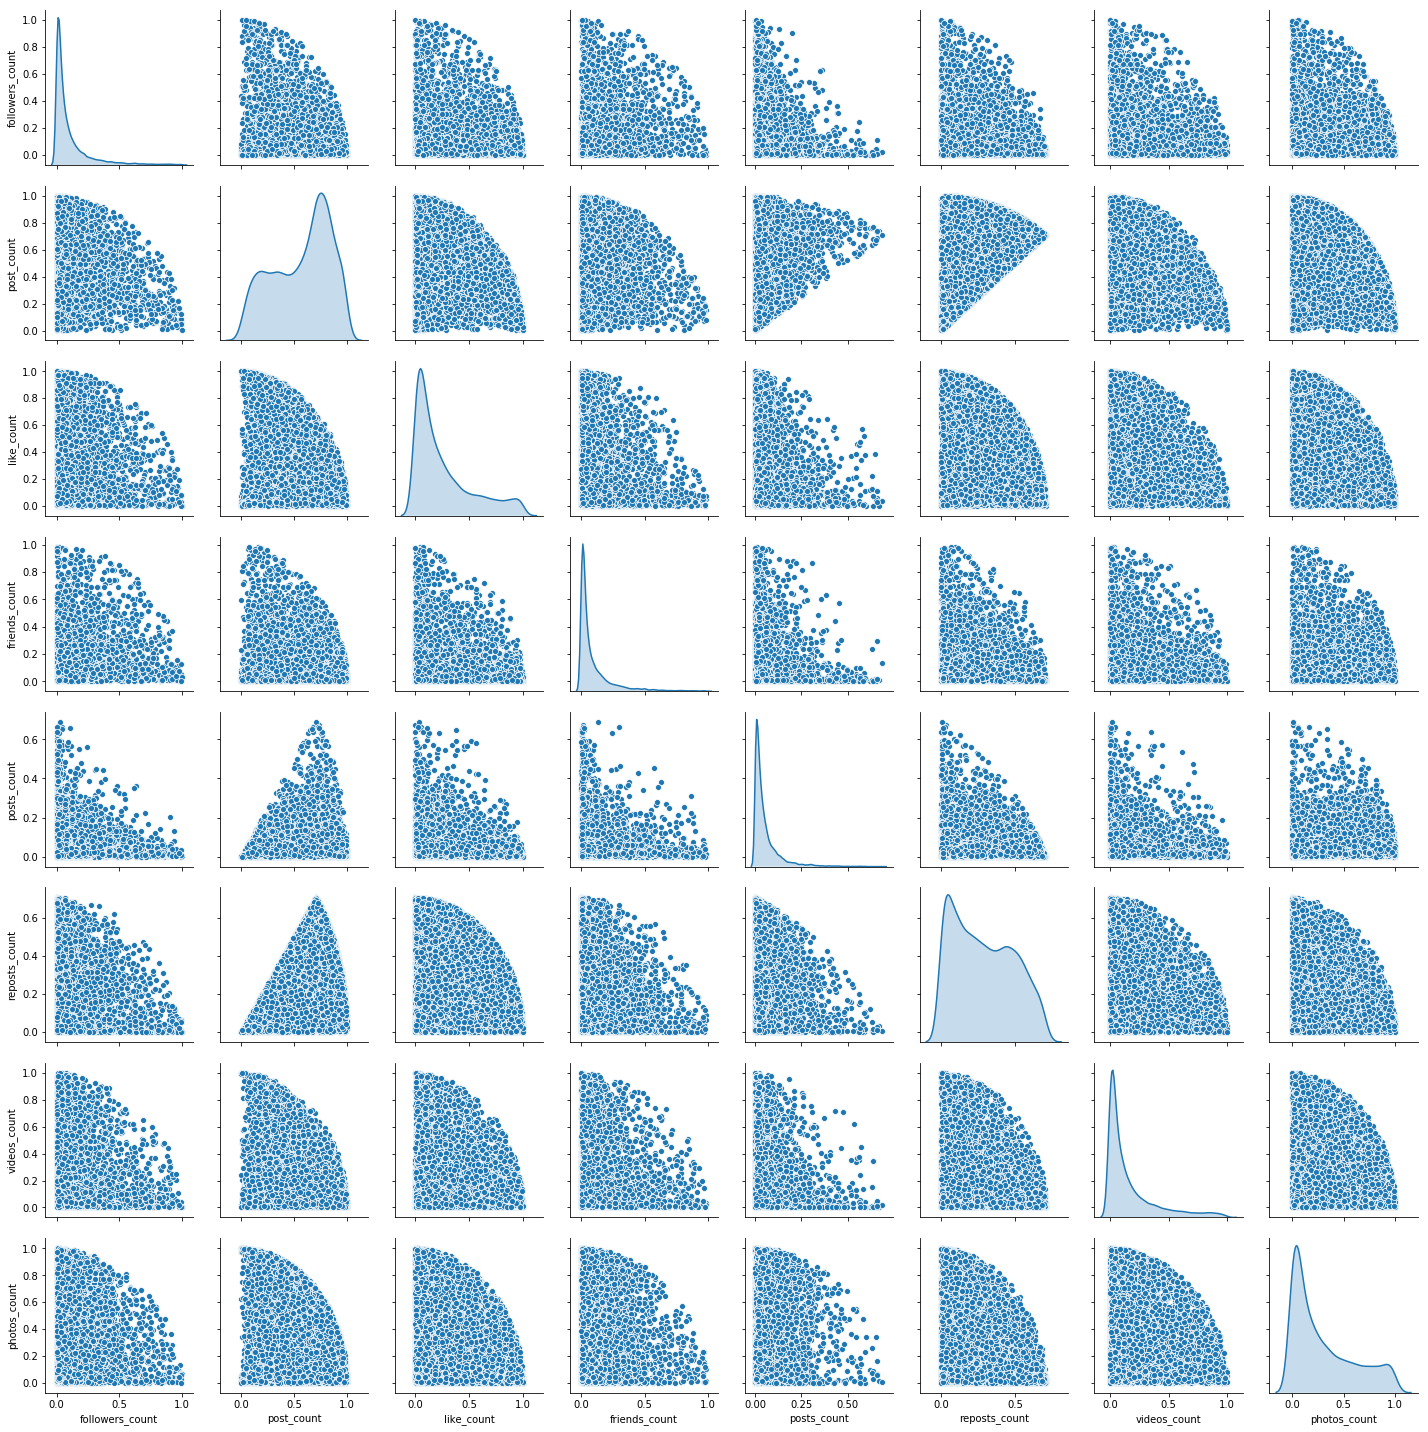

In [14]:
seaborn.pairplot(data, diag_kind="kde")

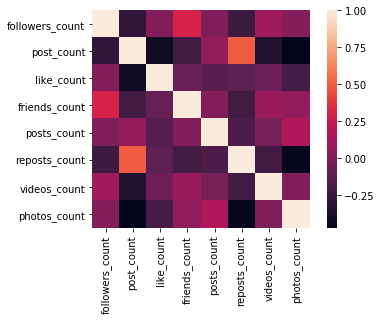

In [15]:
seaborn.heatmap(data.corr(), square=True)

In [19]:
data.to_csv('gender_set_normal.csv',index=False)